In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
data = pd.read_csv('/content/sample_data/dataset1 (1).csv')

print('Sample Data:')
data.head()

Sample Data:


,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,Pengetian,Ya,Rutin,Kuat,PD,Ya
1,2,Pengetian,Ya,Rutin,Kuat,Gerogi,Tidak
2,3,Pengetian,Tidak,Jarang,Lemah,Gerogi,Tidak
3,4,Menekan,Ya,Rutin,Kuat,PD,Ya
4,5,Menekan,Tidak,Rutin,Lemah,Gerogi,Tidak


In [3]:
# Mengubah data kategorikal menjadi numerik
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [4]:
# Memisahkan fitur dan target
X = data.drop('Menang', axis=1)
y = data['Menang']

In [5]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Membuat model neural network
model = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

In [7]:
# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

Akurasi: 100.00%


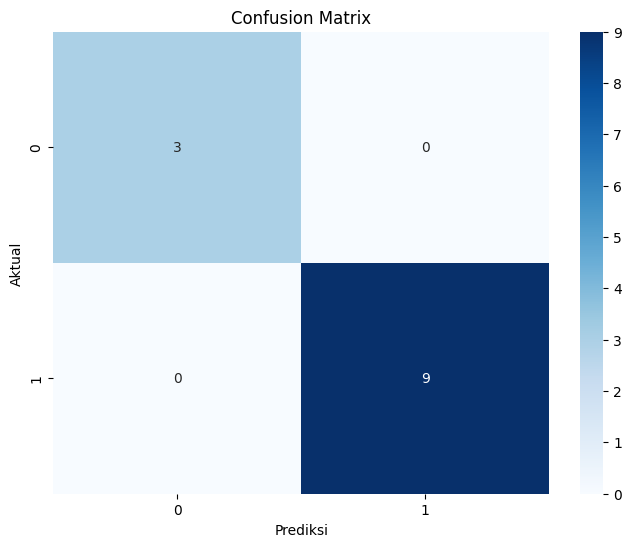

In [9]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Membuat classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

